In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
warnings.filterwarnings('ignore')


Part 1 Predicting Professor Salary
Load the dataset
Perform EDA on this dataset
Remove outliers
Separate numerical features from categorical features
Build a two-factors model to predict the Salary with both YrsSincePhd and YrsOfService as its correlation is higher
Check if the model pass cross validation
Use one-hot encoding to include the Rank, Sex and Discipline along with the above numerical variable to build a second model.
Comment on whether the model improve or not after adding the categorical variables in terms of model performance as well as validation

In [2]:
housing = pd.read_csv("opa_properties_public.csv")
housing.head()

,the_geom,the_geom_webmercator,assessment_date,basements,beginning_point,book_and_page,building_code,building_code_description,category_code,category_code_description,...,year_built,year_built_estimate,zip_code,zoning,pin,building_code_new,building_code_description_new,objectid,lat,lng
0,0101000020E6100000288FB7AD4BC452C0C6E4F1E75A01...,0101000020110F00002693FA5D94E05FC1EE7D5D356691...,2022-05-24,NaN,120' NW EADOM ST,987458.0,RB,NON PD PKG LOT COMMERCIAL,6,VACANT LAND,...,NaN,NaN,19137.0,IRMX,1001189957,NaN,NaN,433143301,40.010587,-75.067119
1,0101000020E610000015F6916732CB52C0D4B37C0242FE...,0101000020110F0000F30438544DEC5FC1AAE24928F78D...,2022-05-24,NaN,273' N OF NORRIS ST,NaN,SR,VACANT LAND RESIDE < ACRE,6,VACANT LAND,...,NaN,NaN,19121.0,RSA5,1001505175,NaN,NaN,433143302,39.986389,-75.174951
2,0101000020E610000066AC299B48CA52C053CA1DF46CFD...,0101000020110F00004ACDE132C0EA5FC17F6F06010B8D...,2022-05-24,NaN,"263' 8"" N COLUMBIA AVE",NaN,U50,ROW CONV/APT 3 STY MASON,2,MULTI FAMILY,...,1890.0,NaN,19121.0,RM1,1001622123,22,ROW TYPICAL,433143303,39.979887,-75.160682
3,0101000020E6100000000000000000F87F000000000000...,NaN,2022-05-24,NaN,"1,115.962' S PATTISON AVE",NaN,SS,VACANT LAND RESIDE ACRE+,6,VACANT LAND,...,NaN,NaN,NaN,NaN,1001319180,NaN,NaN,433143304,NaN,NaN
4,0101000020E61000000C5CFE385BC452C0E38B05E75601...,0101000020110F0000F7332EC5AEE05FC1240EE0C46191...,2022-05-24,NaN,NEC SCATTERGOOD TO,NaN,RB,NON PD PKG LOT COMMERCIAL,6,VACANT LAND,...,NaN,NaN,19137.0,IRMX,1001189938,NaN,NaN,433143305,40.010465,-75.068068


In [3]:
housing.describe()

,category_code,census_tract,cross_reference,depth,exempt_building,exempt_land,exterior_condition,fireplaces,frontage,garage_spaces,...,taxable_building,taxable_land,total_area,total_livable_area,year_built,zip_code,pin,objectid,lat,lng
count,582937.000000,582798.000000,1.375000e+03,578891.000000,5.829170e+05,5.829170e+05,502836.000000,499369.000000,578883.000000,498132.000000,...,5.829160e+05,5.829170e+05,5.806270e+05,5.409260e+05,540926.000000,582801.000000,5.829370e+05,5.829370e+05,582802.000000,582802.000000
mean,1.678964,195.096740,6.339003e+08,83.291024,1.023420e+05,1.891565e+04,3.838013,0.039410,26.683130,0.391001,...,1.706888e+05,6.509278e+04,5.077649e+03,2.599657e+03,1929.101886,19133.373304,1.001363e+09,4.334347e+08,39.999770,-75.143490
std,1.741160,118.860818,2.956609e+08,246.601493,1.946963e+06,8.233688e+05,0.781584,0.260789,452.500174,0.690891,...,1.627579e+06,5.001713e+05,2.968080e+05,2.811115e+04,131.160842,183.236182,1.820191e+05,1.682796e+05,0.050866,0.065874
min,1.000000,1.000000,1.106700e+07,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,19102.000000,1.001049e+09,4.331433e+08,39.875128,-75.274390
25%,1.000000,93.000000,3.713559e+08,58.000000,0.000000e+00,0.000000e+00,4.000000,0.000000,15.000000,0.000000,...,3.088000e+04,2.038000e+04,8.850000e+02,1.080000e+03,1920.000000,19123.000000,1.001205e+09,4.332890e+08,39.957570,-75.182693
50%,1.000000,184.000000,7.824274e+08,77.000000,0.000000e+00,0.000000e+00,4.000000,0.000000,16.000000,0.000000,...,9.216000e+04,3.496000e+04,1.280000e+03,1.278000e+03,1925.000000,19134.000000,1.001363e+09,4.334347e+08,39.996442,-75.155155
75%,1.000000,302.000000,8.823670e+08,100.000000,8.000000e+04,0.000000e+00,4.000000,0.000000,21.000000,1.000000,...,1.638400e+05,5.300000e+04,2.061000e+03,1.650000e+03,1950.000000,19144.000000,1.001520e+09,4.335805e+08,40.039845,-75.104873
max,16.000000,891.000000,1.000000e+09,168423.000000,4.691553e+08,3.418426e+08,7.000000,10.000000,338387.000000,72.000000,...,3.120000e+08,7.800000e+07,2.076941e+08,1.023612e+07,2025.000000,88888.000000,1.001686e+09,4.337262e+08,40.137705,-74.958190


In [4]:
housing.columns

Index(['the_geom', 'the_geom_webmercator', 'assessment_date', 'basements',
       'beginning_point', 'book_and_page', 'building_code',
       'building_code_description', 'category_code',
       'category_code_description', 'census_tract', 'central_air',
       'cross_reference', 'date_exterior_condition', 'depth',
       'exempt_building', 'exempt_land', 'exterior_condition', 'fireplaces',
       'frontage', 'fuel', 'garage_spaces', 'garage_type',
       'general_construction', 'geographic_ward', 'homestead_exemption',
       'house_extension', 'house_number', 'interior_condition', 'location',
       'mailing_address_1', 'mailing_address_2', 'mailing_care_of',
       'mailing_city_state', 'mailing_street', 'mailing_zip', 'market_value',
       'market_value_date', 'number_of_bathrooms', 'number_of_bedrooms',
       'number_of_rooms', 'number_stories', 'off_street_open',
       'other_building', 'owner_1', 'owner_2', 'parcel_number', 'parcel_shape',
       'quality_grade', 'recording_d

In [5]:
drop_column_list = ['the_geom','type_heater', 'unfinished', 'utility', 'view_type', 'topography','suffix','fuel','exterior_condition','exempt_land', 'exempt_building','assessment_date','beginning_point', 'book_and_page', 'category_code_description', 'cross_reference', 'house_number','location', 'mailing_address_1', 'mailing_address_2', 'mailing_care_of', 'mailing_city_state', 'mailing_street', 'market_value_date','the_geom_webmercator','other_building','owner_1', 'owner_2', 'parcel_number', 'recording_date', 'sale_date', 'registry_number', 'unit', 'objectid','building_code', 'census_tract', 'date_exterior_condition', 'year_built_estimate', 'house_extension', 'mailing_zip', 'sewer', 'site_type','state_code',                    'street_designation', 'street_name', 'street_direction',       'geographic_ward']
data = housing.drop(drop_column_list, axis = 1)

In [6]:
data.columns

Index(['basements', 'building_code_description', 'category_code',
       'central_air', 'depth', 'fireplaces', 'frontage', 'garage_spaces',
       'garage_type', 'general_construction', 'homestead_exemption',
       'interior_condition', 'market_value', 'number_of_bathrooms',
       'number_of_bedrooms', 'number_of_rooms', 'number_stories',
       'off_street_open', 'parcel_shape', 'quality_grade', 'sale_price',
       'separate_utilities', 'street_code', 'taxable_building', 'taxable_land',
       'total_area', 'total_livable_area', 'year_built', 'zip_code', 'zoning',
       'pin', 'building_code_new', 'building_code_description_new', 'lat',
       'lng'],
      dtype='object')

In [7]:
data.number_of_bathrooms

0         NaN
1         NaN
2         0.0
3         NaN
4         NaN
         ... 
582932    NaN
582933    NaN
582934    NaN
582935    NaN
582936    NaN
Name: number_of_bathrooms, Length: 582937, dtype: float64

In [8]:
data = data.dropna(subset=['number_of_bathrooms'])


In [9]:
bathroom_counts = data['number_of_bathrooms'].value_counts()
print(bathroom_counts)

number_of_bathrooms
1.0     318236
0.0     114600
2.0      51660
3.0      11684
4.0       2434
5.0        452
6.0        307
7.0        101
8.0         93
10.0        29
9.0         28
12.0        16
11.0        11
13.0         4
14.0         3
21.0         2
15.0         2
22.0         1
17.0         1
16.0         1
25.0         1
Name: count, dtype: int64


After looking at the dataset I noticed that there are NAN values inside the market value, as this is a very oimportant festure, we will replsce the NANs with the median

In [10]:
data = data.dropna(subset=['market_value'])

In [11]:
data.isnull().any()

basements                         True
building_code_description         True
category_code                    False
central_air                       True
depth                             True
fireplaces                        True
frontage                          True
garage_spaces                     True
garage_type                       True
general_construction              True
homestead_exemption              False
interior_condition                True
market_value                     False
number_of_bathrooms              False
number_of_bedrooms                True
number_of_rooms                   True
number_stories                    True
off_street_open                   True
parcel_shape                      True
quality_grade                     True
sale_price                        True
separate_utilities                True
street_code                      False
taxable_building                  True
taxable_land                     False
total_area               

In [12]:
data['market_value'] = data['market_value'].fillna(data['market_value'].mean())
data['total_area'] = data['total_area'].fillna(data['total_area'].mean())



<Axes: xlabel='market_value'>

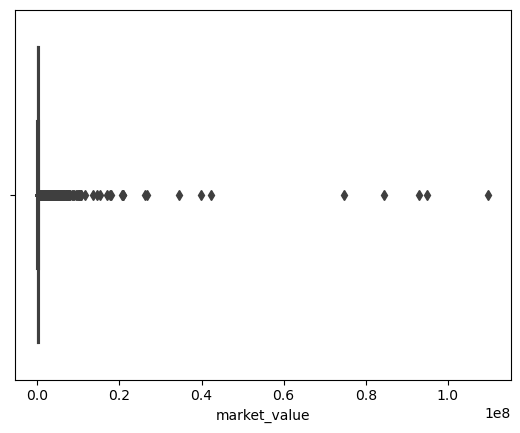

In [13]:
sns.boxplot(x=data['market_value'])


<Axes: xlabel='market_value'>

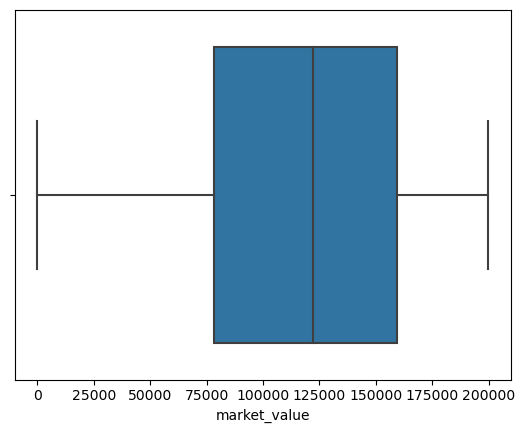

In [14]:
#Removing YrsOfService outliers
data = data[ data.market_value < 200000]
sns.boxplot(x=data['market_value'])


<Axes: xlabel='total_area'>

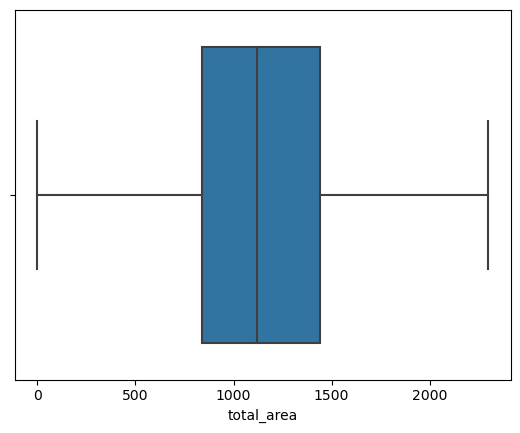

In [15]:
#Removing YrsOfService outliers
data = data[ data.total_area < 2300]
sns.boxplot(x=data['total_area'])

In [16]:
data

,basements,building_code_description,category_code,central_air,depth,fireplaces,frontage,garage_spaces,garage_type,general_construction,...,total_area,total_livable_area,year_built,zip_code,zoning,pin,building_code_new,building_code_description_new,lat,lng
11,NaN,ROW 2 STY MASONRY,1,NaN,44.0,0.0,14.0,0.0,NaN,A,...,609.0,840.0,1915.0,19132.0,RSA5,1001071884,22,ROW TYPICAL,39.991279,-75.174171
42,D,PRIV GAR 1 STY MASONRY,1,NaN,64.0,0.0,14.0,0.0,NaN,A,...,776.0,258.0,1899.0,19125.0,RSA5,1001129558,NaN,NaN,39.977132,-75.127125
83,D,ROW 3 STY MASONRY,1,NaN,57.0,0.0,15.0,0.0,NaN,A,...,869.0,1619.0,1920.0,19130.0,RSA5,1001392027,22,ROW TYPICAL,39.966744,-75.167490
137,NaN,ROW B/GAR 2 STY MASONRY,1,NaN,81.0,0.0,16.0,0.0,NaN,A,...,1293.0,1376.0,1940.0,19131.0,RSA5,1001364309,24,ROW PORCH FRONT,39.986468,-75.239986
178,NaN,ROW CONV/APT 3 STY MASON,2,NaN,63.0,0.0,17.0,0.0,NaN,A,...,1036.0,2615.0,1915.0,19132.0,RM1,1001166899,22,ROW TYPICAL,39.990526,-75.153870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582908,F,ROW B/GAR 2 STY MASONRY,1,Y,61.0,0.0,18.0,1.0,NaN,A,...,1101.0,1168.0,1950.0,19149.0,RSA5,1001367315,23,ROW POST WAR,40.030409,-75.065480
582911,NaN,PRIV GAR 1 STY MASONRY,1,N,23.0,0.0,14.0,1.0,NaN,A,...,311.0,311.0,1940.0,19120.0,RSA5,1001328149,NaN,NaN,40.029283,-75.133497
582913,NaN,ROW 2 STY MASONRY,1,NaN,63.0,0.0,15.0,0.0,NaN,A,...,943.0,1092.0,1925.0,19139.0,RSA5,1001177379,24,ROW PORCH FRONT,39.964473,-75.242760
582914,F,ROW B/GAR 2 STY MASONRY,1,NaN,89.0,0.0,16.0,1.0,NaN,A,...,1420.0,1152.0,1945.0,19149.0,RSA5,1001559000,24,ROW PORCH FRONT,40.036864,-75.044498


# Linear regression 

In [17]:
Xarray = data['market_value'].values
Yarray = data['total_area'].values

In [18]:
X = Xarray.reshape(-1, 1)
Y = Yarray.reshape(-1, 1)

In [19]:
model1 = LinearRegression()
model1.fit(X, Y)

LinearRegression()

In [20]:
Y_pred = model1.predict(X)

In [21]:
Y_pred 

array([[ 898.32479234],
       [ 805.45252533],
       [ 848.7122458 ],
       ...,
       [ 989.38196618],
       [1376.90435718],
       [ 973.95367427]])

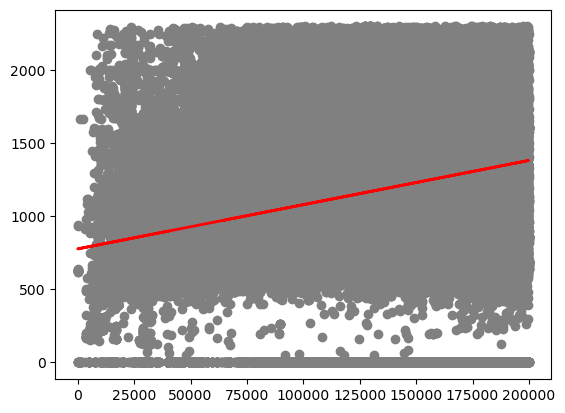

In [22]:
plt.scatter(X, Y,  color='gray')
plt.plot(X, Y_pred, color='red', linewidth=2)
plt.show()

In [23]:
#Splitting Data intro training and testing set
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(0.8 * data.shape[0])
print(0.2 * data.shape[0])

(209253, 1)
(52314, 1)
(209253, 1)
(52314, 1)
209253.6
52313.4


In [25]:
#Splitting Data intro training and testing set
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [26]:
model2 = LinearRegression()
model2.fit(X_train, Y_train)

LinearRegression()

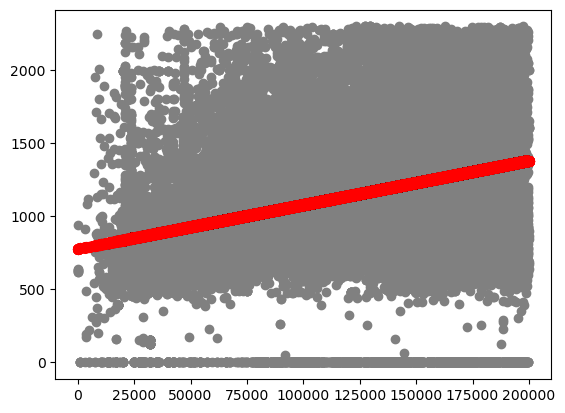

In [27]:
Y_pred = model2.predict(X_test)
plt.scatter(X_test, Y_test,  color='gray')
plt.scatter(X_test, Y_pred, color='red', linewidth=2)
plt.show()

In [28]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-squared:', metrics.r2_score(Y_test, Y_pred)) # r^2 value isnt up to par becuase of how larger the data is 

Mean Absolute Error: 326.0883379477789
Mean Squared Error: 193541.86162706168
Root Mean Squared Error: 439.9339287064157
R-squared: 0.09270770092675906


## Linear regression Evalulation Metrics 

In [29]:
predictions = model2.predict(X_test)

In [30]:
# Assuming predictions are continuous values
threshold = 0.5  
predictions_binary = [1 if p >= threshold else 0 for p in predictions]

# Assuming Y_test is continuous
Y_test_categorical = [1 if y >= threshold else 0 for y in Y_test]

print(classification_report(Y_test_categorical, predictions_binary))
print(accuracy_score(Y_test_categorical, predictions_binary))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2532
           1       0.95      1.00      0.98     49782

    accuracy                           0.95     52314
   macro avg       0.48      0.50      0.49     52314
weighted avg       0.91      0.95      0.93     52314

0.9515999541231792


## Building a two factor model to predict the price with both the number of bathrooms and total area as its coloration is higher 

In [31]:
X = data[['total_area','number_of_bathrooms']].values.reshape(-1, 2)
Y = data['market_value'].values.reshape(-1, 1)
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(209253, 2) (52314, 2)
(209253, 1) (52314, 1)


In [32]:
model2f = LinearRegression()
model2f.fit(X_train, Y_train)
Y_pred = model2f.predict(X_test)
print(model2f.coef_)
print(model2f.intercept_)

[[  30.05411376 7411.2995086 ]]
[76136.60856434]


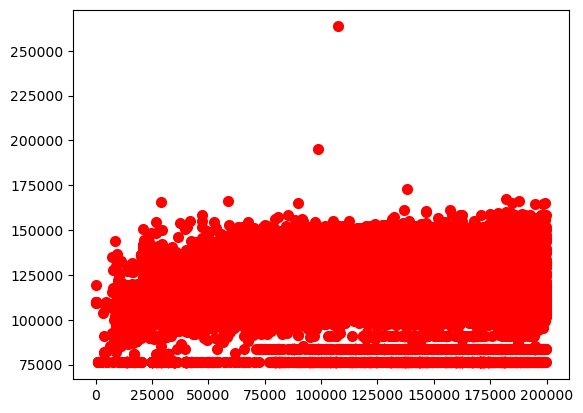

In [33]:
plt.scatter(Y_test, Y_pred, color='red', linewidth=2)
plt.show()

In [34]:
print('R-squared:', metrics.r2_score(Y_test, Y_pred))


R-squared: 0.09657676928849557


In [35]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-squared:', metrics.r2_score(Y_test, Y_pred)) # r^2 value isnt up to par becuase of how larger the data is 

Mean Absolute Error: 37415.5165843725
Mean Squared Error: 1955461423.934547
Root Mean Squared Error: 44220.59954291153
R-squared: 0.09657676928849557


# Decision Tree 

In [36]:
from sklearn.tree import DecisionTreeRegressor

# Create and fit the DecisionTreeRegressor
tree_model = DecisionTreeRegressor(random_state=101)
tree_model.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=101)

In [37]:
# Predictions
Y_pred = tree_model.predict(X_test)

# Evaluate the model
threshold = 0.5  
predictions_binary = [1 if p >= threshold else 0 for p in predictions]

# Assuming Y_test is continuous
Y_test_categorical_Decision_Tree = [1 if y >= threshold else 0 for y in Y_test]

## Decision Tree Evalulation Metrics 

In [38]:
print(classification_report(Y_test_categorical_Decision_Tree, predictions_binary))
print(accuracy_score(Y_test_categorical_Decision_Tree, predictions_binary))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       1.00      1.00      1.00     52307

    accuracy                           1.00     52314
   macro avg       0.50      0.50      0.50     52314
weighted avg       1.00      1.00      1.00     52314

0.9998661926061857


In [39]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_categorical_Decision_Tree, predictions_binary))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_categorical_Decision_Tree, predictions_binary))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_categorical_Decision_Tree, predictions_binary)))
print('R-squared:', metrics.r2_score(Y_test_categorical_Decision_Tree, predictions_binary)) # r^2 value isnt up to par becuase of how larger the data is 

Mean Absolute Error: 0.00013380739381427533
Mean Squared Error: 0.00013380739381427533
Root Mean Squared Error: 0.011567514591055216
R-squared: -0.00013382530062933107


# Random Forest 

In [40]:
from sklearn.ensemble import RandomForestRegressor

# Create and fit the Random Forest
rmd_clf = RandomForestRegressor(random_state=101)
rmd_clf.fit(X_train, Y_train)

# Predictions
Y_pred = rmd_clf.predict(X_test)

# Evaluate the model
threshold = 0.5  
predictions_binary = [1 if p >= threshold else 0 for p in predictions]

# Assuming Y_test is continuous
Y_test_categorical_Randomforest = [1 if y >= threshold else 0 for y in Y_test]

## Random Forest Evalulation Metrics 

In [41]:
print(classification_report(Y_test_categorical_Randomforest, predictions_binary))
print(accuracy_score(Y_test_categorical_Randomforest, predictions_binary))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       1.00      1.00      1.00     52307

    accuracy                           1.00     52314
   macro avg       0.50      0.50      0.50     52314
weighted avg       1.00      1.00      1.00     52314

0.9998661926061857


In [42]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_categorical_Randomforest, predictions_binary))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_categorical_Randomforest, predictions_binary))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_categorical_Randomforest, predictions_binary)))
print('R-squared:', metrics.r2_score(Y_test_categorical_Randomforest, predictions_binary))

Mean Absolute Error: 0.00013380739381427533
Mean Squared Error: 0.00013380739381427533
Root Mean Squared Error: 0.011567514591055216
R-squared: -0.00013382530062933107


# Gradient Boosting

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

gb_clf = GradientBoostingRegressor(learning_rate=0.5, random_state=100)
gb_clf.fit(X_train, Y_train)

Y_pred = gb_clf.predict(X_test)

threshold = 0.5  
predictions_binary = [1 if p >= threshold else 0 for p in predictions]

# Assuming Y_test is continuous
Y_test_categorical_Gb = [1 if y >= threshold else 0 for y in Y_test]

## Gradient Boosting Evalulation Metrics

In [44]:
print(classification_report(Y_test_categorical_Gb, predictions_binary))
print(accuracy_score(Y_test_categorical_Gb, predictions_binary))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       1.00      1.00      1.00     52307

    accuracy                           1.00     52314
   macro avg       0.50      0.50      0.50     52314
weighted avg       1.00      1.00      1.00     52314

0.9998661926061857


In [45]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_categorical_Gb, predictions_binary))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_categorical_Gb, predictions_binary))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_categorical_Gb, predictions_binary)))
print('R-squared:', metrics.r2_score(Y_test_categorical_Gb, predictions_binary))

Mean Absolute Error: 0.00013380739381427533
Mean Squared Error: 0.00013380739381427533
Root Mean Squared Error: 0.011567514591055216
R-squared: -0.00013382530062933107
